<a href="https://colab.research.google.com/github/thanga-v2/Transformers/blob/main/Eng_Spa_Translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip

--2024-08-23 08:50:38--  https://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.128.207, 74.125.143.207, 173.194.69.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  3.78MB/s    in 0.7s    

2024-08-23 08:50:39 (3.78 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [ ]:
!unzip -nq spa-eng.zip

In [ ]:

!ls

sample_data  spa-eng  spa-eng.zip


In [ ]:
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [ ]:
# dictionary
# key can be an input phrase
# value can be an output phrase

eng2spa = {}
for line in open('spa-eng/spa.txt'):
  print(line)

Streaming output truncated to the last 5000 lines.
I'm going to do my homework as soon as I get home this afternoon.	Voy a hacer mis deberes tan pronto como regrese a casa esta tarde.

I'm going to sit on the bench over there next to the street lamp.	Me voy a sentar en aquella banca, al lado de la farola.

I'm going to sit on the bench over there next to the street lamp.	Voy a sentarme en aquel banco, cerca de la farola.

I'm not likely to be finished doing that before Monday afternoon.	No parece que vaya a terminar de hacer eso antes del lunes por la tarde.

I'm not the only one here who thinks it's a good idea to do that.	No soy el único aquí que piensa que es una buena idea hacer eso.

I'm not the only one here who thinks it's a good idea to do that.	No soy el único aquí que piensa que es buena idea hacer eso.

I'm pretty hungry since I haven't eaten since early this morning.	Tengo bastante hambre porque no he comido desde esta mañana temprano.

I'm so glad that you asked me to give

In [ ]:
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  print(line)

Streaming output truncated to the last 5000 lines.
You can save your breath. There is no use talking to him.	No merece la pena. No tiene sentido hablar con él.
You catch more flies with honey than you do with vinegar.	Se atrapan más moscas con miel que con vinagre.
You don't have to make a different dish for every person.	No hay que preparar un plato diferente para cada persona.
You have changed so much that I can hardly recognize you.	Has cambiado tanto que me cuesta reconocerte.
You have no right to interfere in other people's affairs.	No tienes derecho a interferir en los asuntos de otras personas.
You have wanted to go there for a long time, haven't you?	Has querido ir allí durante mucho tiempo, ¿no?
You may only borrow my camera if you are careful with it.	Sólo te dejo la cámara si tienes cuidado con ella.
You must decide whether you will go by train or by plane.	Tienes que decidir si vas a ir en tren o en avión.
You must take into account the fact that he is too young.	Debes tene

In [ ]:
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  english, spanish = line.split('\t')
  if english not in eng2spa:
    eng2spa[english] = [ ]
  eng2spa[english].append(spanish)

In [ ]:
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [ ]:
eng2spa['Where am I?']

['¿Dónde estoy?', '¿En dónde estoy?']

BLEU Score -

Very Important

Its a function available in nltk library

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

Import a special tokenizer, since the BLEU works only with tokens rather than the context.


**This is a simple tokenizer to remove punctuation**


In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
tokenizer.tokenize("Wei heissen Sie?.".lower())

In [ ]:
tokens = tokenizer.tokenize("Wei heissen Sie?.".lower())
tokens

In [ ]:
bleu_score = sentence_bleu([tokens], tokens)
bleu_score

In [ ]:
tokenizer.tokenize('¿Tom es divertido?')

In [ ]:
spa_tokens = tokenizer.tokenize('¿Tom es divertido?')
sentence_bleu([spa_tokens],spa_tokens)

In [ ]:
sentence_bleu([['hi']],['hi'])

In [ ]:
smoother=SmoothingFunction()
sentence_bleu(['hi'],'hi', smoothing_function=smoother.method4)

In [ ]:
sentence_bleu([[1,2,3,4]],[1,2,3,4])

In [ ]:
sentence_bleu(['hi am thanga from chennai'.split()],'hi am thanga from chennai'.split())

Pre tokenize our targets.

i.e remove the punctuations.



In [ ]:
type(eng2spa)

In [ ]:
for key in eng2spa:
  print(key)

In [ ]:
for i, (keys,values) in enumerate(eng2spa.items()):
  if i < 10:
    print(f'English word {keys} and its translation {values}')

In [ ]:
for keys, values in eng2spa.items():
  print(values[:30])

In [ ]:
spa_list = []
for key, values in eng2spa.items():
  for text in values:
    spa_tokens = tokenizer.tokenize(text.lower())
    spa_list.append(spa_tokens)

In [ ]:
spa_list

In [ ]:
eng_span_tokens = {}
spalist = []
for key, values in eng2spa.items():
  for text in values:
    spa_tokens = tokenizer.tokenize(text.lower())
    spalist.append(spa_tokens)
  eng_span_tokens[key] = spalist


In [ ]:
eng_spa_tokens = {}

for eng, spa in eng2spa.items():
  spa_list = []
  for text in spa:
    spa_tk = tokenizer.tokenize(text.lower())
    spa_list.append(spa_tk)
  eng_spa_tokens[eng] = spa_list

In [ ]:
eng_spa_tokens

In [ ]:
eng_span_tokens

In [ ]:
!pip install transformers sentencepiece transformers[sentencepiece]

In [ ]:
from transformers import pipeline
translator = pipeline("translation", model='Helsinki-NLP/opus-mt-en-es', device=0)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [ ]:
translator('I like to have some water')

[{'translation_text': 'Me gusta tener un poco de agua.'}]

In [ ]:
eng_phrases = list(eng2spa.keys())

In [ ]:
len(eng_phrases)

102904

We can't process all the data, it will be huge.

In [61]:
subset = eng_phrases[20_000:21_000]

In [63]:
translations = translator(subset)


Calculate the Bleu score.


In [67]:
scores = []

for eng, pred in zip(subset, translations):
  #print(eng_spa_tokens[eng])
  matches = eng_spa_tokens[eng]

  # tokenize the translations
  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

  score = sentence_bleu(matches, spa_pred)

  scores.append(score)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

(array([649.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   4.,
          0.,   3.,   0.,   0.,   0.,   0.,   0.,  16.,   0.,   0.,   0.,
          0.,   3.,   7.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 313.]),
 array([0.        , 0.01666667, 0.03333333, 0.05      , 0.06666667,
        0.08333333, 0.1       , 0.11666667, 0.13333333, 0.15      ,
        0.16666667, 0.18333333, 0.2       , 0.21666667, 0.23333333,
        0.25      , 0.26666667, 0.28333333, 0.3       , 0.31666667,
        0.33333333, 0.35      , 0.36666667, 0.38333333, 0.4       ,
        0.41666667, 0.43333333, 0.45      , 0.46666667, 0.48333333,
        0.5       , 0.51666667, 0.53333333, 0.55      , 0.56666667,
        0.58333333, 0.6       , 0.61666667, 0.63333333, 0.65      ,
        0.66666667, 0.68333333, 0.7       , 0.

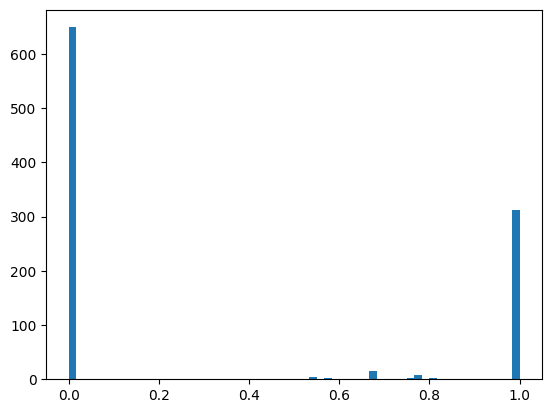

In [70]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=60)